In the last tutorial we used the apple price to generate the moving average plots. Similarly we can also import the returns from the quantopian research library.

### Returns Data

In [10]:
from quantopian.research import returns, symbols

In [11]:
period_start = '2014-01-01'
period_end = '2014-12-31'

aapl_returns = returns(assets=symbols("AAPL"),
                      start = period_start,
                      end = period_end)

aapl_returns.head(10)

2014-01-02 00:00:00+00:00   -0.014137
2014-01-03 00:00:00+00:00   -0.022027
2014-01-06 00:00:00+00:00    0.005376
2014-01-07 00:00:00+00:00   -0.007200
2014-01-08 00:00:00+00:00    0.006406
2014-01-09 00:00:00+00:00   -0.012861
2014-01-10 00:00:00+00:00   -0.006674
2014-01-13 00:00:00+00:00    0.005043
2014-01-14 00:00:00+00:00    0.020123
2014-01-15 00:00:00+00:00    0.020079
Freq: C, Name: Equity(24 [AAPL]), dtype: float64

We can plot the Apple stock returns.

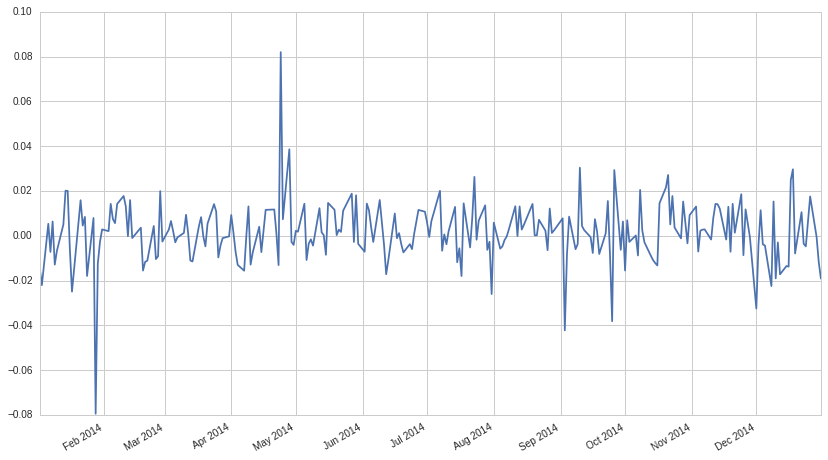

In [12]:
aapl_returns.plot()

We can also calculate the cumulative returns for the Apple stock.

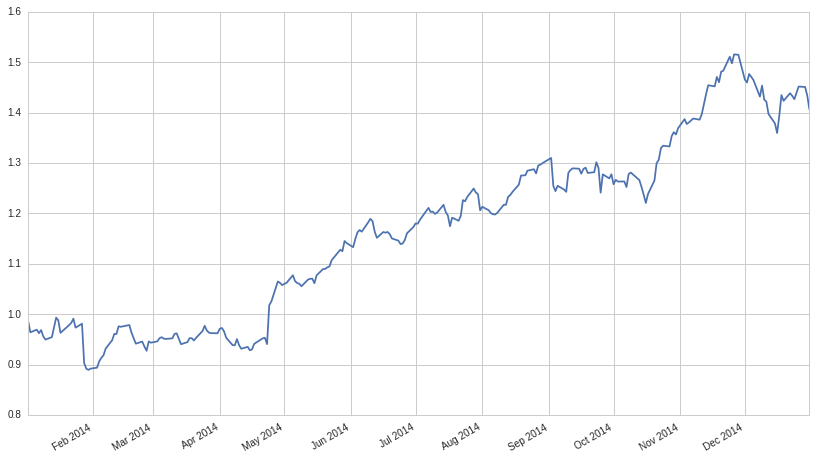

In [13]:
(aapl_returns + 1).cumprod().plot()

### Alternative Data

But quantopian also gives us access to alternative data. One such data is the sentiment analysis data from stocktwits. Below we will import and download that data for all stocks in the universe. Later we will learn how to use screens to filter this universe.

In [14]:
from quantopian.research import run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.data.psychsignal import stocktwits

To download the data we need to build a pipeline. So that it returns only the relavant data points.

In [15]:
def make_pipeline():
    
    returns = Returns(window_length = 2)
    sentiment = stocktwits.bull_minus_bear.latest
    msg_volume = stocktwits.total_scanned_messages.latest
    
    return Pipeline(
    
        columns = {
            
            'returns':returns,
            'sentiment':sentiment,
            'msg_vol':msg_volume
        }
    
    )

data_output = run_pipeline(make_pipeline(),
                          period_start,
                          period_end)

The above data pipeline will return the columns "msg_vol", "returns" & "sentiment" for all the stocks.

In [16]:
data_output.head(10)

msg_vol   returns  sentiment
2014-01-02 00:00:00+00:00 Equity(2 [ARNC])          6.0  0.009497       0.00
                          Equity(21 [AAME])         1.0  0.053846       0.00
                          Equity(24 [AAPL])       203.0  0.012011      -0.82
                          Equity(25 [ARNC_PR])      NaN       NaN        NaN
                          Equity(31 [ABAX])         1.0 -0.002990      -2.22
                          Equity(39 [DDC])          NaN  0.015570        NaN
                          Equity(41 [ARCB])         NaN -0.004728        NaN
                          Equity(52 [ABM])          1.0 -0.007636       1.90
                          Equity(53 [ABMD])         1.0 -0.027303       0.00
                          Equity(62 [ABT])          1.0 -0.001562       0.00

Next we will plot this data for just one stock Chipotle.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d620aa7f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f9d6217ad68>], dtype=object)

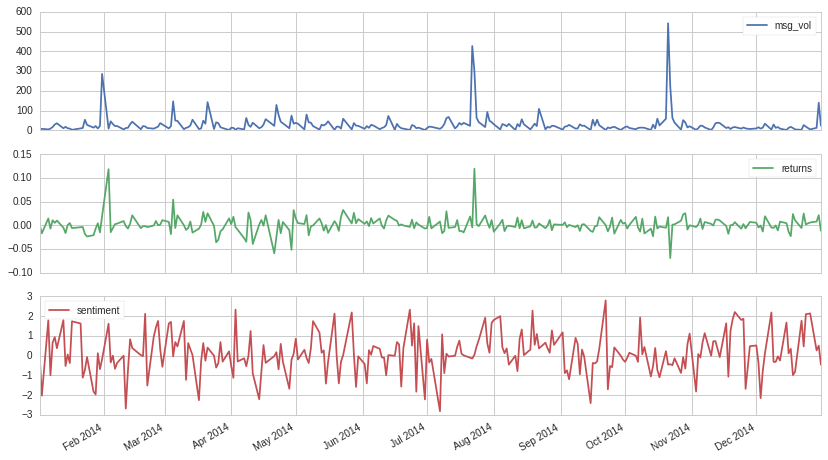

In [17]:
data_output.xs(symbols('CMG'),level = 1).plot(subplots=True)

We can also print the long table for all our values. The below table shows the dataframe for just one day "2014-1-2".

In [18]:
data_output.xs('2014-01-02 00:00:00+00:00')

,msg_vol,returns,sentiment
Equity(2 [ARNC]),6.0,0.009497,0.00
Equity(21 [AAME]),1.0,0.053846,0.00
Equity(24 [AAPL]),203.0,0.012011,-0.82
Equity(25 [ARNC_PR]),NaN,NaN,NaN
Equity(31 [ABAX]),1.0,-0.002990,-2.22
Equity(39 [DDC]),NaN,0.015570,NaN
Equity(41 [ARCB]),NaN,-0.004728,NaN
Equity(52 [ABM]),1.0,-0.007636,1.90
Equity(53 [ABMD]),1.0,-0.027303,0.00
Equity(62 [ABT]),1.0,-0.001562,0.00
